## Installing and importing libraries

In [0]:
#Prerequisites (external libraries not found in Google Colab)
!pip install wikipedia
!pip install wikipedia-api
###Baseline classifiers libraries###

#Keras Neural Network (Feedforward)
from keras.metrics import top_k_categorical_accuracy
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense
#Computations 
import numpy as np
#Tables
import pandas as pd
from google.colab.data_table import DataTable
#Sklearn classifiers and utils
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=e1267a9060304e35d2f3e2eda68f71e584e2d404aeb65a02ee0f57d45aeeee8d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=087d22fdaa173016a71f4d6849f26899d6d926e666c0339a05b6d53a334f5f59
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api


Using TensorFlow backend.


### Project library modules

In [0]:
from getpass import getpass
#[TODO:] Temporal; change when publishing repo to public
user = 'andresC98' 
password = getpass('GitHub repo password')
u = user; p = password; 
!git clone https://$u:$p@github.com/$u/One-Shot-DocClassifier.git
%cd One-Shot-DocClassifier/lib
!ls
del p, password

GitHub repo password··········
Cloning into 'One-Shot-DocClassifier'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 263 (delta 143), reused 171 (delta 71), pack-reused 0
Receiving objects: 100% (263/263), 1.68 MiB | 9.26 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/One-Shot-DocClassifier/lib
arxiv_parser.py  doc_utils.py		wiki_parser.py
class_utils.py	 max_sim_classifier.py


In [0]:
###Importing project library###

import doc_utils #cleaning and other helper functions (visualization...)
from max_sim_classifier import MaxSimClassifier #maximum similarity classifier
#Parser libraries: wikipedia dataset and arxiv dataset
from arxiv_parser import arxiv_parser
from wiki_parser import concurrentGetWikiFullPage, concurrentGetAllCatArticles

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data retrieval by Parsers , split and preprocessing

In [0]:
engineering_topic_defs = concurrentGetWikiFullPage(topics_list = doc_utils.ALL_TOPICS )

engineering_articles, n_test_samples = concurrentGetAllCatArticles(doc_utils.ALL_TOPICS, full_text_test=True)

Obtaining full wikipedia page for the topic: Chemical engineering. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Biomedical engineering. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Civil engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Electrical engineering. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Mechanical engineering. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Aerospace engineering. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Software engineering. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Industrial engineering. (Definition of Class #[7])
Obtaining full wikipedia page for the topic: Computer engineering. (Definition of Class #[8])
Retrieved 38 articles from category topic 'Computer engineering'[TopicID:8]
Retrieved 57 articles from category topic 'Software engineering'[TopicID

In [0]:
arxiv_topic_defs = concurrentGetWikiFullPage(topics_list = doc_utils.ARXIV_WIKI_TOPICS )

arxiv_dataset, paperslist = arxiv_parser(100)

Obtaining full wikipedia page for the topic: Computer science. (Definition of Class #[0])
Obtaining full wikipedia page for the topic: Economics. (Definition of Class #[1])
Obtaining full wikipedia page for the topic: Systems engineering. (Definition of Class #[2])
Obtaining full wikipedia page for the topic: Mathematics. (Definition of Class #[3])
Obtaining full wikipedia page for the topic: Astrophysics. (Definition of Class #[4])
Obtaining full wikipedia page for the topic: Computational biology. (Definition of Class #[5])
Obtaining full wikipedia page for the topic: Quantitative finance. (Definition of Class #[6])
Obtaining full wikipedia page for the topic: Statistics. (Definition of Class #[7])
Retrieving papers for subject: computer_science
Retrieving papers for subject: economics
Retrieving papers for subject: eess
Retrieving papers for subject: mathematics
Retrieving papers for subject: physics
Retrieving papers for subject: q_biology
Retrieving papers for subject: q_finance
R

In [0]:
#MSC ,SVM and MNB compatible (clf_data): NOTE: Preprocess type selected in pipeline later
x_train_CLF_W_defs, y_train_CLF_W_defs, x_test_CLF_W_full, y_test_CLF_W_full = doc_utils.processClassifierData(engineering_topic_defs, engineering_articles,topics = doc_utils.ALL_TOPICS,dataset_type ="wiki")
x_train_CLF_A_defs, y_train_CLF_A_defs, x_test_CLF_A_full, y_test_CLF_A_full = doc_utils.processClassifierData(arxiv_topic_defs, arxiv_dataset,topics = doc_utils.ARXIV_WIKI_TOPICS,dataset_type ="arxiv")

In [0]:
#Obtaining TRAIN-TEST split documents from original TEST ARTICLES
x_train_CLF_A, x_test_CLF_A, y_train_CLF_A, y_test_CLF_A = train_test_split(x_test_CLF_A_full, y_test_CLF_A_full, random_state=2020)
x_train_CLF_W, x_test_CLF_W, y_train_CLF_W, y_test_CLF_W = train_test_split(x_test_CLF_W_full, y_test_CLF_W_full,random_state=2020)

In [0]:
#Selected the "custom preprocessing" datasets as they performed the best at DocDefs topics
x_train_FFNN_W_C_defs, y_train_FFNN_W_C_defs, x_test_FFNN_W_C_full, y_test_FFNN_W_C_full, dictionary_FFNN_W_C = doc_utils.processNeuralNetData(engineering_topic_defs,engineering_articles,dataset_type = "wiki",preprocess = 'custom')
x_train_FFNN_A_C_defs, y_train_FFNN_A_C_defs, x_test_FFNN_A_C_full, y_test_FFNN_A_C_full, dictionary_FFNN_A_C = doc_utils.processNeuralNetData(arxiv_topic_defs,arxiv_dataset,dataset_type = "arxiv",preprocess = 'custom')

In [0]:
x_train_FFNN_A, x_test_FFNN_A, y_train_FFNN_A, y_test_FFNN_A = train_test_split(x_test_FFNN_A_C_full, y_test_FFNN_A_C_full, random_state=2020)
x_train_FFNN_W, x_test_FFNN_W, y_train_FFNN_W, y_test_FFNN_W = train_test_split(x_test_FFNN_W_C_full, y_test_FFNN_W_C_full, random_state=2020)

# Document classification using articles - Baseline models

## SVM

### arXiv dataset

In [0]:
best_svm_arxiv_score = 0
svm_arxiv_models_params = list()
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for idf in [True, False]:
            for stop_words in ['english', None]:
                for ngram_range in [(1,1), (1,2)]:
                    #Training the SVM for the hyperparam  + preprocessing combinations
                    svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                    ('tfidf', TfidfTransformer(use_idf=idf)),
                                    ('clf', SVC(C=C, gamma=gamma)),
                                    ])    
                    svm.fit(x_train_CLF_A, y_train_CLF_A)
                    # evaluate the SVM on the test set
                    score = svm.score(x_test_CLF_A, y_test_CLF_A)

                    #keeping track of the combinations
                    params = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                    svm_arxiv_models_params.append((score, params))

                    # if we got a better score, store the score and parameters
                    if score > best_svm_arxiv_score:
                        best_svm_arxiv_score = score
                        best_svm_arxiv_parameters = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best Top-1 Accuracy: {:.4f}".format(best_svm_arxiv_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_svm_arxiv_parameters))

Best Top-1 Accuracy: 0.6850
Best parameters: {'C': 10, 'gamma': 0.1, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 1)}


In [0]:
stop_words = best_svm_arxiv_parameters['stop_words']
ngram_range = best_svm_arxiv_parameters['ngram_range']
idf = best_svm_arxiv_parameters['idf']
C = best_svm_arxiv_parameters['C']
gamma = best_svm_arxiv_parameters['gamma']

svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', SVC(C=C, gamma=gamma)),
                ])    
svm.fit(x_train_CLF_A, y_train_CLF_A)

y_test_preds_class = svm.predict(x_test_CLF_A)
y_test_preds_proba = svm.decision_function(x_test_CLF_A)

In [0]:
_ = doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_A_full,verbose=1)

TOP-1 acc.: 	0.710
TOP-2 acc.: 	0.875


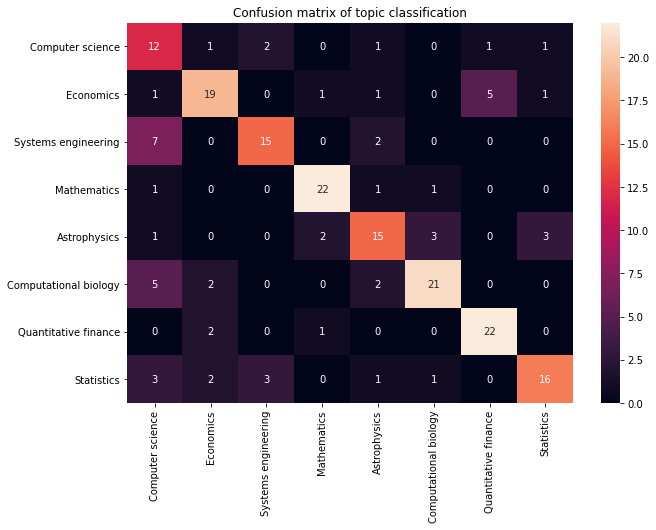

In [0]:
doc_utils.plotConfMatrix(y_test_CLF_A_full, y_test_preds_class, model="SVM", dataset_type='arxiv')

### Wiki dataset

In [0]:
best_svm_wiki_score = 0
svm_wiki_models_params = list()
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        for idf in [True, False]:
            for stop_words in ['english', None]:
                for ngram_range in [(1,1), (1,2)]:
                    #Training the SVM for the hyperparam  + preprocessing combinations
                    svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                    ('tfidf', TfidfTransformer(use_idf=idf)),
                                    ('clf', SVC(C=C, gamma=gamma)),
                                    ])    
                    svm.fit(x_train_CLF_W, y_train_CLF_W)
                    # evaluate the SVM on the test set
                    score = svm.score(x_test_CLF_W, y_test_CLF_W)

                    #keeping track of the combinations
                    params = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                    svm_wiki_models_params.append((score, params))

                    # if we got a better score, store the score and parameters
                    if score > best_svm_wiki_score:
                        best_svm_wiki_score = score
                        best_svm_wiki_parameters = {'C': C, 'gamma': gamma, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best Top-1 Accuracy: {:.4f}".format(best_svm_wiki_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_svm_wiki_parameters))

Best Top-1 Accuracy: 0.7831
Best parameters: {'C': 10, 'gamma': 0.1, 'idf': True, 'stop_words': None, 'ngram_range': (1, 1)}


As it can be noted: accuracy increases but so does time required for training+evaluating 30 different models on grid search: before was 6 mins, now 45 mins --> almos 750% increased train time

In [0]:
stop_words = best_svm_wiki_parameters['stop_words']
ngram_range = best_svm_wiki_parameters['ngram_range']
idf = best_svm_wiki_parameters['idf']
C = best_svm_wiki_parameters['C']
gamma = best_svm_wiki_parameters['gamma']

svm = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', SVC(C=C, gamma=gamma)),
                ])    
svm.fit(x_train_CLF_W, y_train_CLF_W)

y_test_preds_class = svm.predict(x_test_CLF_W)
y_test_preds_proba = svm.decision_function(x_test_CLF_W)

In [0]:
_ = doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_W,verbose=1)

TOP-1 acc.: 	0.743
TOP-2 acc.: 	0.892


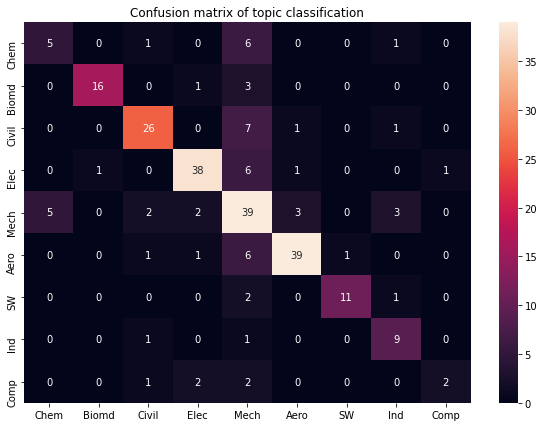

In [0]:
doc_utils.plotConfMatrix(y_test_CLF_W, y_test_preds_class, model="SVM", dataset_type='wiki')

##MNB

### arXiv dataset

In [0]:
best_mnb_arxiv_score = 0
mnb_arxiv_models_params = list()
for alpha in [0.001, 0.01, 0.1, 1]:
    for idf in [True, False]:
        for stop_words in ['english', None]:
            for ngram_range in [(1,1), (1,2)]:
                # for each combination of parameters, train a MNB
                mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                ('tfidf', TfidfTransformer(use_idf=idf)),
                                ('clf', MultinomialNB(alpha=alpha)),
                                ])    
                mnb.fit(x_train_CLF_A, y_train_CLF_A)
                # evaluate the MNB on the test set
                score = mnb.score(x_test_CLF_A, y_test_CLF_A)

                params = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                mnb_arxiv_models_params.append((score, params))
                # if we got a better score, store the score and parameters
                if score > best_mnb_arxiv_score:
                    best_mnb_arxiv_score = score
                    best_mnb_arxiv_parameters = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best score: {:.3f}".format(best_mnb_arxiv_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_mnb_arxiv_parameters))

Best score: 0.730
Best parameters: {'alpha': 0.01, 'idf': False, 'stop_words': 'english', 'ngram_range': (1, 2)}


Fast (less number of test done), same top1 acc as SVM for arXiv data

In [0]:
stop_words = best_mnb_arxiv_parameters['stop_words']
ngram_range = best_mnb_arxiv_parameters['ngram_range']
idf = best_mnb_arxiv_parameters['idf']
alpha = best_mnb_arxiv_parameters['alpha']

mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', MultinomialNB(alpha=alpha)),
                ])    
mnb.fit(x_train_CLF_A, y_train_CLF_A) 

y_test_preds_class = mnb.predict(x_test_CLF_A)
y_test_preds_proba = mnb.predict_proba(x_test_CLF_A)

In [0]:
doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_A,verbose=1)

TOP-1 acc.: 	0.730
TOP-2 acc.: 	0.870


(0.73, 0.87)

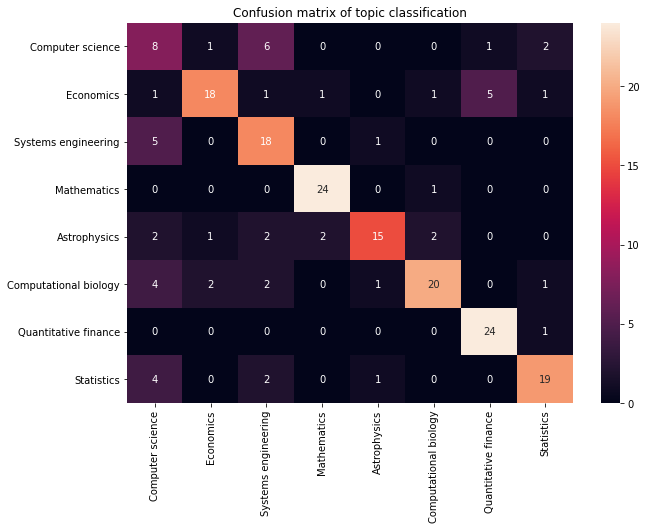

In [0]:
doc_utils.plotConfMatrix(y_test_CLF_A, y_test_preds_class, model="NB", dataset_type='arxiv')

### Wiki dataset

In [0]:
best_mnb_wiki_score = 0
mnb_wiki_models_params = list()
for alpha in [0.001, 0.01, 0.1, 1]:
    for idf in [True, False]:
        for stop_words in ['english', None]:
            for ngram_range in [(1,1), (1,2)]:
                # for each combination of parameters, train a MNB
                mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                                ('tfidf', TfidfTransformer(use_idf=idf)),
                                ('clf', MultinomialNB(alpha=alpha)),
                                ])    
                mnb.fit(x_train_CLF_W, y_train_CLF_W)
                # evaluate the MNB on the test set
                score = mnb.score(x_test_CLF_W, y_test_CLF_W)

                params = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}
                mnb_wiki_models_params.append((score, params))
                # if we got a better score, store the score and parameters
                if score > best_mnb_wiki_score:
                    best_mnb_wiki_score = score
                    best_mnb_wiki_parameters = {'alpha': alpha, 'idf': idf, 'stop_words':stop_words, 'ngram_range':ngram_range}

print("Best score: {:.3f}".format(best_mnb_wiki_score))#(Top-1 acc score)
print("Best parameters: {}".format(best_mnb_wiki_parameters))

Best score: 0.767
Best parameters: {'alpha': 0.01, 'idf': True, 'stop_words': 'english', 'ngram_range': (1, 2)}


fast (less number of params to search), and LESS performance than SVM

In [0]:
stop_words = best_mnb_wiki_parameters['stop_words']
ngram_range = best_mnb_wiki_parameters['ngram_range']
idf = best_mnb_wiki_parameters['idf']
alpha = best_mnb_wiki_parameters['alpha']

mnb = Pipeline([('vect', CountVectorizer(stop_words=stop_words,ngram_range=ngram_range)),
                ('tfidf', TfidfTransformer(use_idf=idf)),
                ('clf', MultinomialNB(alpha=alpha)),
                ])    
mnb.fit(x_train_CLF_W, y_train_CLF_W) 

y_test_preds_class = mnb.predict(x_test_CLF_W)
y_test_preds_proba = mnb.predict_proba(x_test_CLF_W)

In [0]:
_ = doc_utils.top2_acc(y_test_preds_proba, y_test_CLF_W,verbose=1)

TOP-1 acc.: 	0.767
TOP-2 acc.: 	0.884


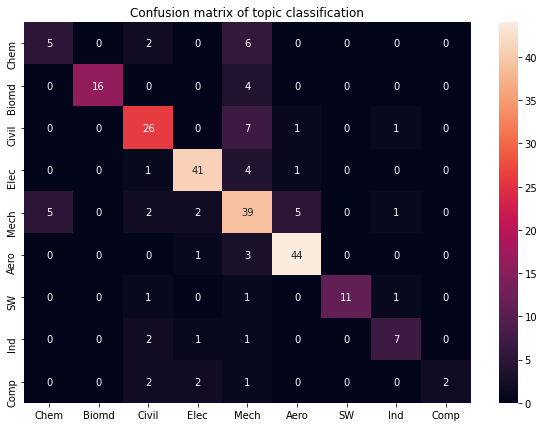

In [0]:
doc_utils.plotConfMatrix(y_test_CLF_W, y_test_preds_class, model="NB", dataset_type='wiki')

##FFNN

In [0]:
#Defining TOP-2 accuracy 
import functools
top2_accuracy = functools.partial(top_k_categorical_accuracy, k=2)
top2_accuracy.__name__ = 'TOP2_ACC'

### arXiv dataset

In [0]:
top1_acc_list = []
top2_acc_list = []
n_runs = 30
for i in range(n_runs):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_A_C),)))
    model.add(Dense(len(doc_utils.ARXIV_WIKI_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_A, y_train_FFNN_A, epochs=5,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_A, y_test_FFNN_A, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_A, y_test_FFNN_A, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("arxiv_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("arxiv_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

In [0]:
print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))


Resulting Average TOP1 acc:0.7008333305517832	 TOP2 acc:0.8618333458900451
Best model accuracies: TOP1:0.7250000238418579 	 TOP2:0.8999999761581421


In [0]:
#FFNN is the model getting most beneficiated out of the augmented data available

In [0]:
from keras.models import model_from_json
json_f = open('arxiv_model_arq1.json', 'r')
best_model_json = json_f.read()
json_f.close()
best_model = model_from_json(best_model_json)
best_model.load_weights("arxiv_model_arq1.h5")#loading weights

# evaluate loaded model on test data
best_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
predictions = best_model.predict_classes(x_test_FFNN_A) #for later building confusion matrix
print("Best FFNN model TOP-1 acc.:",best_model.evaluate(x_test_FFNN_A, y_test_FFNN_A, verbose=0)[1])
print("Best FFNN model TOP-2 acc.:",best_model.evaluate(x_test_FFNN_A, y_test_FFNN_A, verbose=0)[2])

Best FFNN model TOP-1 acc.: 0.7049999833106995
Best FFNN model TOP-2 acc.: 0.8999999761581421


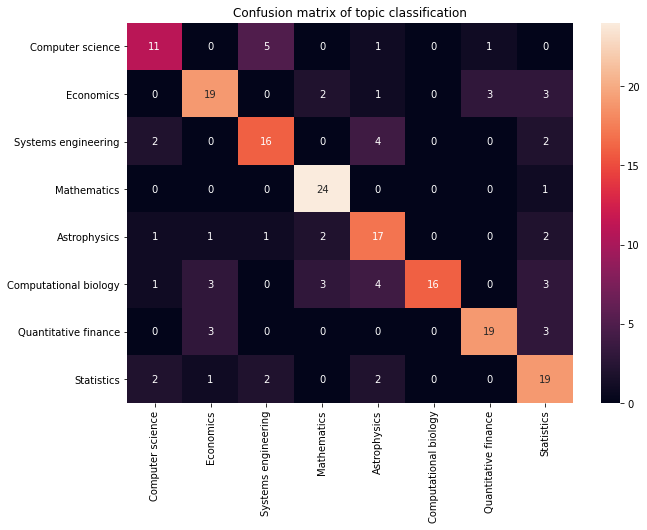

In [0]:
doc_utils.plotConfMatrix(y_test_FFNN_A, predictions, model = "NN",dataset_type="arxiv")

### Wiki dataset

In [0]:
top1_acc_list = []
top2_acc_list = []
n_runs = 30
for i in range(n_runs):
    clear_session()
    #Neural Architecture Definition
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(len(dictionary_FFNN_W_C),)))
    model.add(Dense(len(doc_utils.ALL_TOPICS), activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
    hist = model.fit(x_train_FFNN_W, y_train_FFNN_W, epochs=5,verbose=0)
    model_top1_acc = model.evaluate(x_test_FFNN_W, y_test_FFNN_W, verbose=0)[1]
    model_top2_acc = model.evaluate(x_test_FFNN_W, y_test_FFNN_W, verbose=0)[2]
         
    if top2_acc_list and model_top2_acc >= max(top2_acc_list):
        #save best model to date
        model_json = model.to_json()
        with open("wiki_model_arq1.json", "w") as f:
            f.write(model_json)
        model.save_weights("wiki_model_arq1.h5")
    
    top1_acc_list.append(model_top1_acc)
    top2_acc_list.append(model_top2_acc)

In [0]:
print("\nResulting Average TOP1 acc:{}\t TOP2 acc:{}".format(np.mean(top1_acc_list),np.mean(top2_acc_list)))
print("Best model accuracies: TOP1:{} \t TOP2:{}".format(max(top1_acc_list), max(top2_acc_list)))


Resulting Average TOP1 acc:0.6989290455977122	 TOP2 acc:0.8622489988803863
Best model accuracies: TOP1:0.7389557957649231 	 TOP2:0.8875501751899719


Resulting Average TOP1 acc:0.7570281088352203	 TOP2 acc:0.8846050898234049
Best model accuracies: TOP1:0.7911646366119385 	 TOP2:0.9156626462936401

In [0]:
json_f = open('wiki_model_arq1.json', 'r')
best_model_json = json_f.read()
json_f.close()
best_model = model_from_json(best_model_json)
best_model.load_weights("wiki_model_arq1.h5")#loading weights

# evaluate loaded model on test data
best_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy', top2_accuracy])
predictions_wiki = best_model.predict_classes(x_test_FFNN_W) #for later building confusion matrix
print("Best FFNN model TOP-1 acc.:",best_model.evaluate(x_test_FFNN_W, y_test_FFNN_W, verbose=0)[1])
print("Best FFNN model TOP-2 acc.:",best_model.evaluate(x_test_FFNN_W, y_test_FFNN_W, verbose=0)[2])

Best FFNN model TOP-1 acc.: 0.7309237122535706
Best FFNN model TOP-2 acc.: 0.8875501751899719


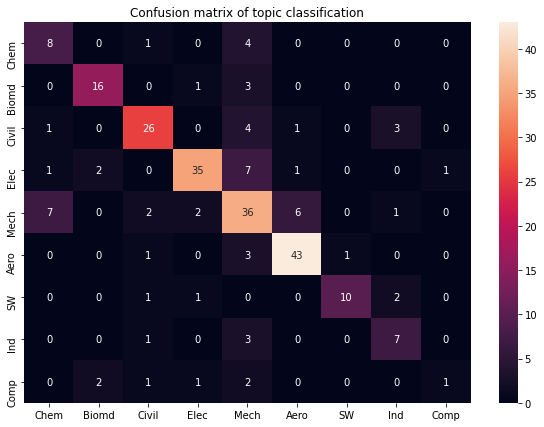

In [0]:
doc_utils.plotConfMatrix(y_test_FFNN_W, predictions_wiki, model = "NN",dataset_type="wiki")

#Document classification using articles - MSC with document embeddings

In [0]:
#From previous grid-search result
best_hparams = {'preprocess': 'custom', 'dm': 0, 'epochs': 50, 'vector_size': 50, 'min_count': 1, 'window': 3}

### arXiv dataset

In [0]:
max_sim_model = MaxSimClassifier("arxiv", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=8)

max_sim_model.fit_articles(x_train_CLF_A, y_train_CLF_A)

#Obtaining TOP-2 Accuracy
max_sim_model.score(x_test_CLF_A, y_test_CLF_A,eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.84

In [0]:
max_sim_model.score(x_test_CLF_A, y_test_CLF_A,eval="top1")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.695

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


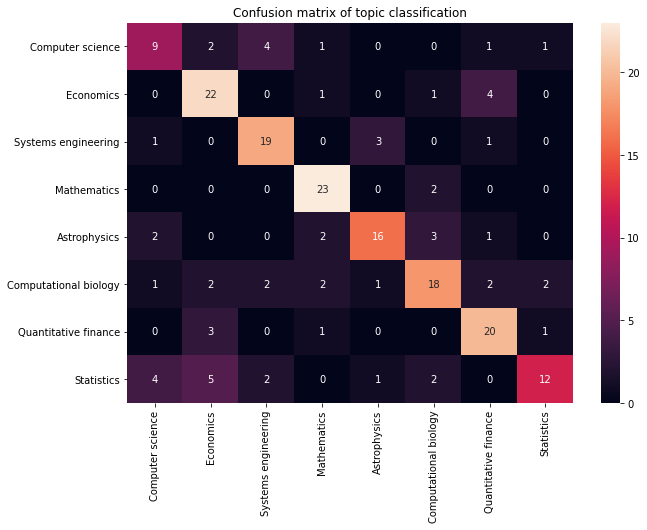

In [0]:
MSC_predictions = max_sim_model.predict(x_test_CLF_A)
doc_utils.plotConfMatrix(y_test_CLF_A, MSC_predictions, model="MSC", dataset_type='arxiv')

###Wiki dataset

In [0]:
max_sim_model = MaxSimClassifier("wiki", best_hparams['preprocess'], best_hparams['vector_size'],best_hparams['min_count'],
                                 best_hparams['epochs'],best_hparams['dm'],best_hparams['window'],workers=8)

max_sim_model.fit_articles(x_train_CLF_W, y_train_CLF_W)

#Obtaining TOP-2 Accuracy
max_sim_model.score(x_test_CLF_W, y_test_CLF_W,eval="top2")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8433734939759037

In [0]:
max_sim_model.score(x_test_CLF_W, y_test_CLF_W,eval="top1")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6987951807228916

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


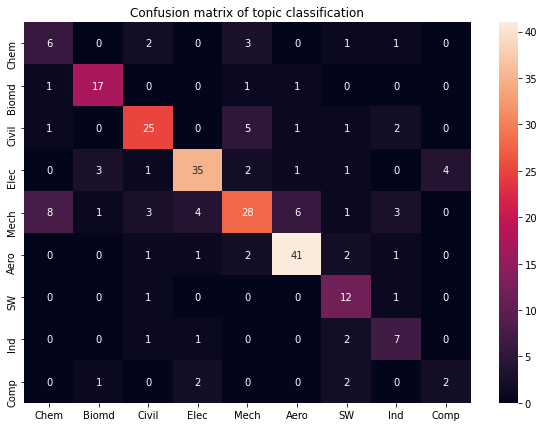

In [0]:
MSC_predictions = max_sim_model.predict(x_test_CLF_W)
doc_utils.plotConfMatrix(y_test_CLF_W, MSC_predictions, model="MSC", dataset_type='wiki')